<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../images/opendata-top-transblack.png" style="width:40%"></a>
</CENTER>

<CENTER>
    <br><h1>An introductional notebook to HEP analysis in C++</h1></br>
</CENTER>

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

<p><b>all done with less that 20 lines of code!</b></p>

The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<h3>Cell #1</h3>
<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

<h3>Cell #2</h3>
<p>In order to activate the interactive visualisation of the histogram that is later created we can use the JSROOT magic:</p>

In [2]:
// %jsroot on

<h3>Cell #3</h3>
<p>Next we have to open the data that we want to analyze. It is stored in a _*.root_ file that consists of a tree having branches and leaves. As you can see , we are reading the data directly from the source!</p>

In [3]:
TFile *file = TFile::Open("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root");
//TFile *file = TFile::Open("/home/student/datasets/MC/mc_105987.WZ.root");

<h3>Cell #4</h3>
<p>The next step is to define a tree named (we called _tree_) to get the data out of the _*.root_ file:</p>

In [4]:
TTree *tree = (TTree*) file->Get("mini");

<h3>Cell #5</h3>
<p>The next step is to extract the varibles we want from the dataset. As mentioned before, we will plot the number of leptons:</p>
<p>(<b>note</b>to know more about the content of the ATLAS Open Data datasets, please go to our <a>documentation)</a></p>

In [5]:
UInt_t lepton_n = -1;
tree->SetBranchAddress("lep_n", &lepton_n);

<h3>Cell #6</h3>
<p>After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas:</p>

In [6]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);

<h3>Cell #7</h3>
<p>Now we define a histogram that will later be placed on this canvas. Its name is _variable_ and the header of the histogram is _Example plot: Number of leptons_. The three following arguments indicate that this histogram contains 4 so called bins which have a range from 0 to 4.</p>

In [7]:
TH1F *hist = new TH1F("variable","Example plot: Number of leptons",4,0,4);

<h3>Cell #8</h3>
<p>The following lines are a loop that goes over the data that is stored in the tree and fills the histogram _h_ that we already defined. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word</p>
__Done!__.

In [8]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist->Fill(lepton_n);
}

std::cout << "Done!" << std::endl;

Done!


<h3>Cell #9</h3>
<p>After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies:</p>

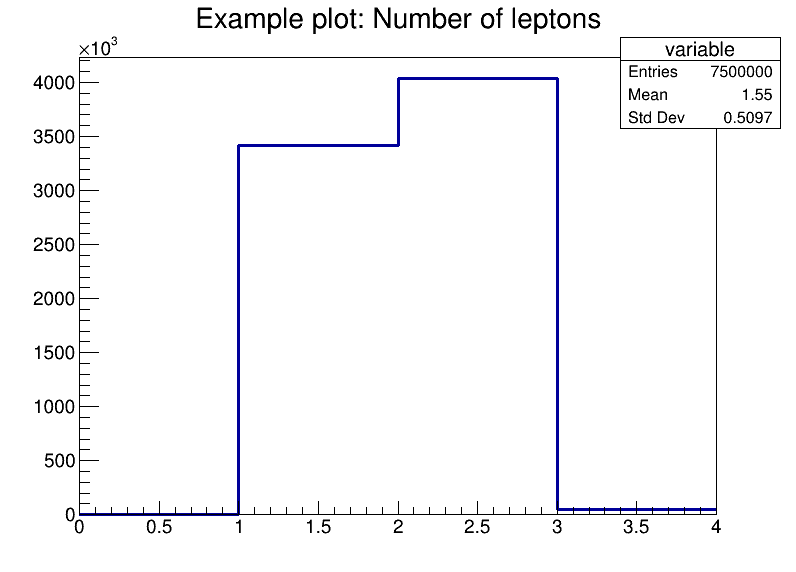

In [9]:
hist->Draw();
canvas->Draw();